In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from copulas.multivariate import GaussianMultivariate

In [4]:
df = pd.read_csv("Data/Maternal Health Risk Data Set.csv")
numeric_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
df = df[numeric_cols]

In [7]:
copula = GaussianMultivariate()
copula.fit(df)

synthetic_data = copula.sample(500)

C:\Users\kdgh685\OneDrive - AZCollaboration\Escritorio\Jose\gan\venv\lib\site-packages\scipy\stats\_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\kdgh685\OneDrive - AZCollaboration\Escritorio\Jose\gan\venv\lib\site-packages\scipy\stats\_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\kdgh685\OneDrive - AZCollaboration\Escritorio\Jose\gan\venv\lib\site-packages\scipy\stats\_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
C:\Users\kdgh685\OneDrive - AZCollaboration\Escritorio\Jose\gan\venv\lib\site-packages\scipy\stats\_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.s

In [8]:
synthetic_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,14.973133,95.412567,84.354506,7.733423,97.925461,68.772920
1,41.918982,121.956754,80.947477,7.341310,97.700913,64.891150
2,42.309668,139.164670,86.187952,12.433146,98.226163,76.844314
3,18.921590,120.669307,70.973196,7.738439,98.532198,91.385107
4,15.384493,121.490397,72.548832,6.752170,101.850637,67.389714
...,...,...,...,...,...,...
495,29.059244,122.546936,87.127209,6.755657,97.884613,63.062724
496,19.049937,143.838933,93.362098,8.381838,97.702136,88.879340
497,14.506230,102.406798,75.154592,17.952907,101.912677,70.029028
498,23.792599,111.756816,75.501245,7.039342,98.332674,77.076251


In [9]:
from sdv.metadata import Metadata
from sdv.evaluation.single_table import evaluate_quality

In [10]:
metadata = Metadata.detect_from_dataframe(
    data=df,
    table_name='maternal_metadata'
)

In [11]:
quality_report = evaluate_quality(
    df,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |███████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 278.44it/s]|
Column Shapes Score: 81.54%

(2/2) Evaluating Column Pair Trends: |████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 114.19it/s]|
Column Pair Trends Score: 96.39%

Overall Score (Average): 88.97%



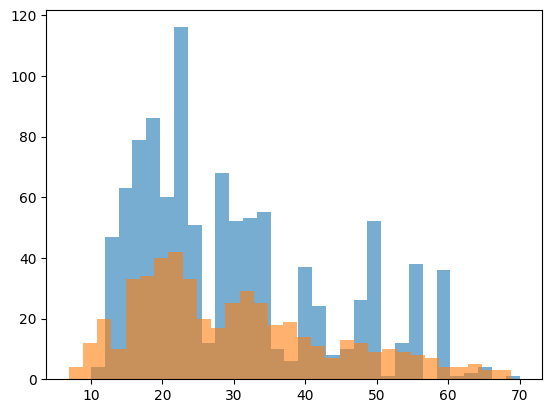

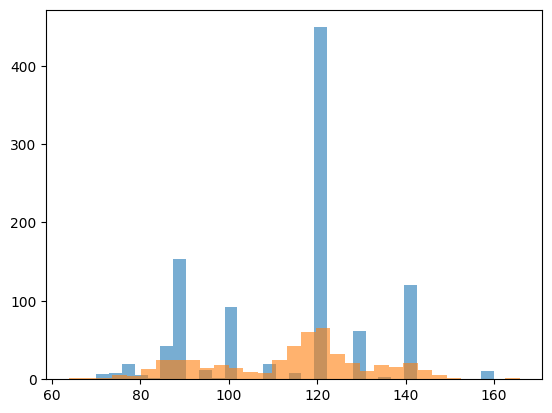

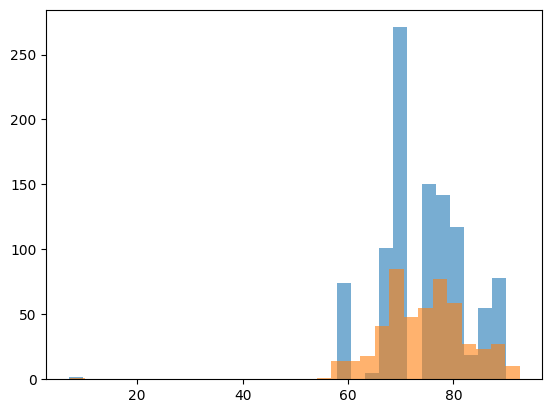

In [15]:
plt.hist(df["Age"].values, bins=31, alpha=0.6)
plt.hist(synthetic_data["Age"].values, bins=31, alpha=0.6)

plt.show()

plt.hist(df["SystolicBP"].values, bins=31, alpha=0.6)
plt.hist(synthetic_data["SystolicBP"].values, bins=31, alpha=0.6)

plt.show()

plt.hist(df["HeartRate"].values, bins=31, alpha=0.6)
plt.hist(synthetic_data["HeartRate"].values, bins=31, alpha=0.6)

plt.show()